## Data Cleaning 

In [1]:
import pandas as pd
import patoolib
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('future.no_silent_downcasting', True)

In [2]:
folder_path = r'D:\Project\Data Portofolio\Telco Customer Churn\dataset'
filename = 'Telco_customer_churn.xlsx'

In [6]:
# extract zip file
patoolib.extract_archive(os.path.join(folder_path, r'raw\Telco_customer_churn.zip'), outdir=folder_path+r'\raw')

INFO patool: Extracting D:\Project\Data Portofolio\Telco Customer Churn\dataset\raw\Telco_customer_churn.zip ...
INFO patool: could not find a 'file' executable, falling back to guess mime type by file extension
INFO patool: ... D:\Project\Data Portofolio\Telco Customer Churn\dataset\raw\Telco_customer_churn.zip extracted to `D:\Project\Data Portofolio\Telco Customer Churn\dataset\raw'.


'D:\\Project\\Data Portofolio\\Telco Customer Churn\\dataset\\raw'

In [7]:
# read data
df = pd.read_excel(os.path.join(folder_path, 'raw/'+filename))

In [8]:
df.head(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

#### Check Missing Value

All columns have complete row except Churn Reason, mostlikely related with Churn Label

In [10]:
# Check the blank Reason
df.loc[:, ['Churn Label','Churn Reason']].drop_duplicates()

,Churn Label,Churn Reason
0,Yes,Competitor made better offer
1,Yes,Moved
4,Yes,Competitor had better devices
5,Yes,Competitor offered higher download speeds
6,Yes,Competitor offered more data
18,Yes,Price too high
19,Yes,Product dissatisfaction
20,Yes,Service dissatisfaction
21,Yes,Lack of self-service on Website
22,Yes,Network reliability


Blank Churn Reason indicates the Non Churn User. This part will be filled with 'Not Churned' instead to avoid missing value interpretation

In [11]:
df['Churn Reason'] = df['Churn Reason'].fillna('Not Churned')

In [12]:
# Re-Check missing value

df.isna().sum()

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
Churn Reason         0
dtype: int64

#### Check Data Type

From df.info() above found 'Total Charge' Column in object data type, while sould be a numerical column

In [13]:
try:
    df['Total Charges'] = df['Total Charges'].astype(float)
except ValueError as e:
    print(e)

could not convert string to float: ' '


In [14]:
# Check 'Total Charges' Column empty string
df.loc[df['Total Charges'] == " ", ['Churn Label','Tenure Months','Monthly Charges','Total Charges','Churn Reason']]

,Churn Label,Tenure Months,Monthly Charges,Total Charges,Churn Reason
2234,No,0,52.55,,Not Churned
2438,No,0,20.25,,Not Churned
2568,No,0,80.85,,Not Churned
2667,No,0,25.75,,Not Churned
2856,No,0,56.05,,Not Churned
4331,No,0,19.85,,Not Churned
4687,No,0,25.35,,Not Churned
5104,No,0,20.00,,Not Churned
5719,No,0,19.70,,Not Churned
6772,No,0,73.35,,Not Churned


It looks like the empty string in 'Total Charges' is caused by 0 tenure months, most likely new user just sign up less than 1 month. To avoid further missing overall calculation, these value will be filled with its Monthly Charges

In [15]:
# Fill the empty string value
df['Total Charges'].replace(" ", np.nan, inplace=True) # replace space with Nan
df['Total Charges'].fillna(df['Monthly Charges'], inplace=True) # fill nan with value

In [16]:
# Re converting to float data type
try:
    df['Total Charges'] = df['Total Charges'].astype(float)
    print('Total Charges column data type : ', df['Total Charges'].dtype)
except ValueError as e:
    print(e)

Total Charges column data type :  float64


#### Check Duplication

In [17]:
# Check Duplicated
print('Any duplication in CustomerID granuality : ', any(df.duplicated(subset=['CustomerID'])))

Any duplication in CustomerID granuality :  False


#### Check Outliers

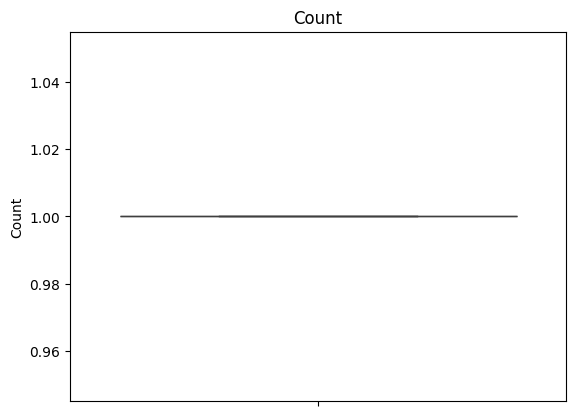

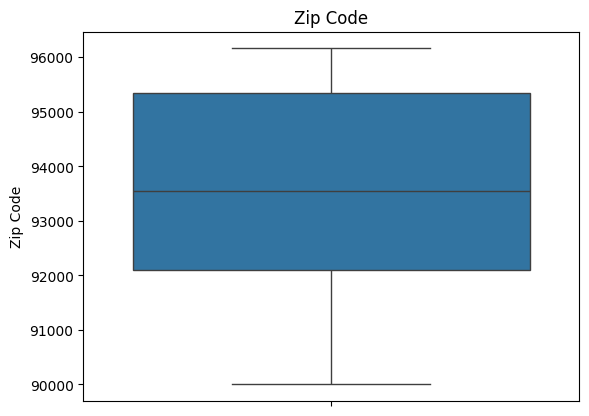

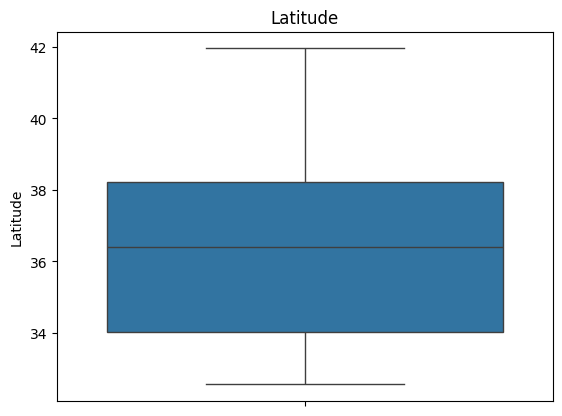

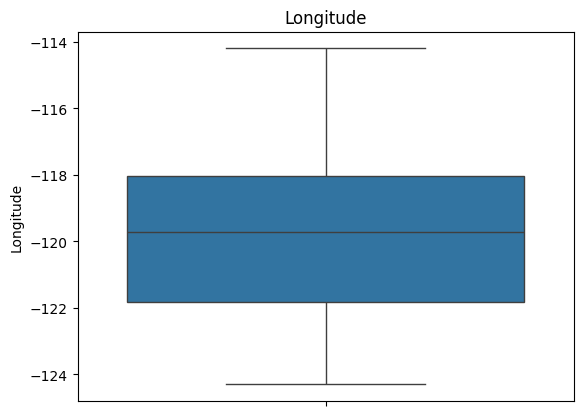

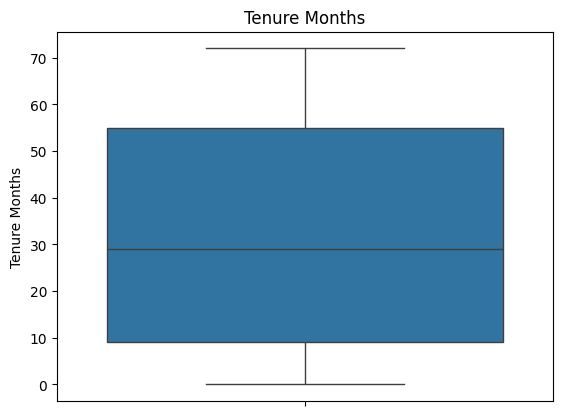

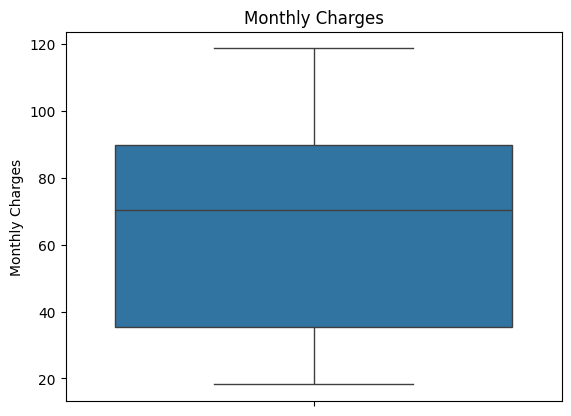

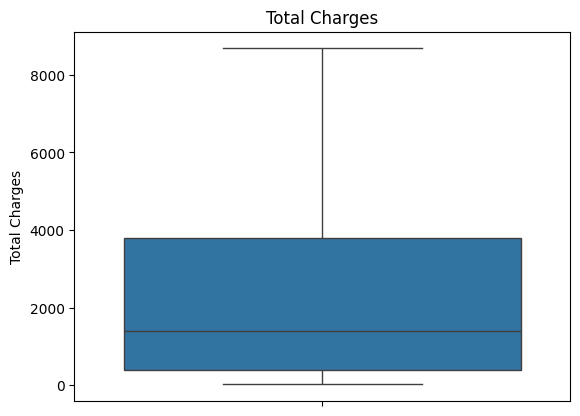

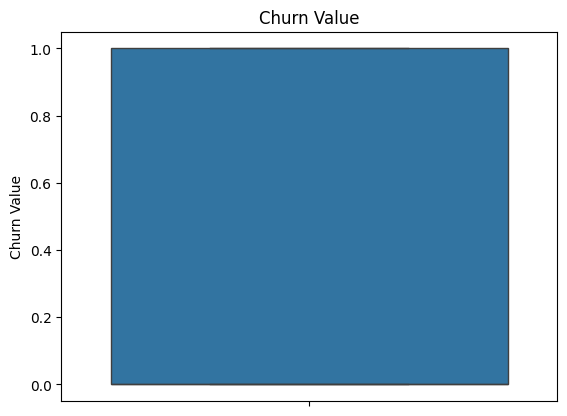

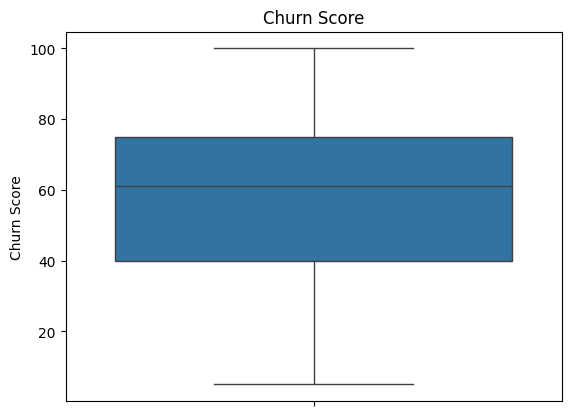

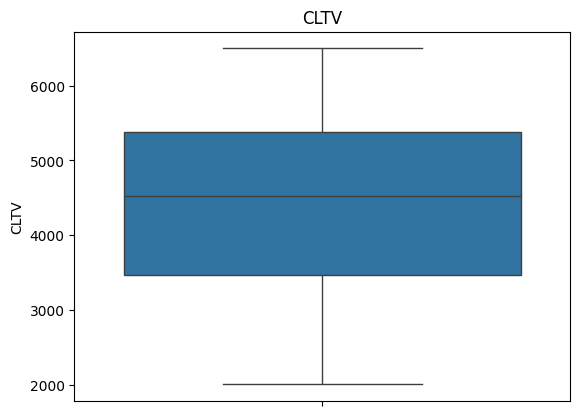

In [18]:
# Check outlier using boxplot
for i in df.select_dtypes(include=np.number).columns:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

No outliers detected in measure column

#### Data Grouping

Since it is important to analyze the Churn Reason, data grouping for this section is needed for a more comprehensive analysis process, which is still detailed in 20 reasons. The category is provided in another excel file (Churn Reason Category)

In [20]:
df_cat = pd.read_excel(os.path.join(folder_path, 'raw/Churn Reason Category.xlsx'))

In [21]:
# Merge Churn Reason Category to master df
df = pd.merge(df, df_cat, on = ['Churn Reason'], how = 'left').drop_duplicates()

#### Export

In [22]:
df.to_csv(os.path.join(folder_path,'Telco_customer_churn_cleaned2.csv'), index=None)